In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
!pip install opencv-python-headless
import cv2


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
img = image.load_img(r"C:\Users\nitish\Downloads\archive(3)\beandata\medium bean\medium (280).png")


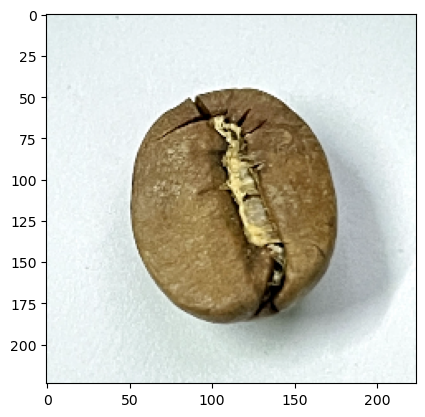

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\nitish\Downloads\archive(3)\beandata\medium bean\medium (280).png").shape


(224, 224, 3)

In [5]:
cv2.imread(r"C:\Users\nitish\Downloads\archive(3)\beandata\medium bean\medium (280).png")

array([[[238, 237, 226],
        [236, 235, 224],
        [239, 238, 227],
        ...,
        [230, 229, 218],
        [232, 231, 220],
        [234, 235, 224]],

       [[237, 236, 225],
        [234, 234, 223],
        [237, 236, 225],
        ...,
        [230, 229, 218],
        [233, 232, 223],
        [231, 233, 221]],

       [[238, 237, 226],
        [237, 236, 225],
        [236, 235, 224],
        ...,
        [227, 227, 216],
        [236, 233, 224],
        [231, 233, 222]],

       ...,

       [[243, 244, 234],
        [242, 243, 233],
        [245, 243, 235],
        ...,
        [248, 248, 241],
        [246, 246, 240],
        [250, 250, 243]],

       [[243, 244, 235],
        [241, 241, 232],
        [244, 242, 233],
        ...,
        [247, 247, 241],
        [252, 252, 245],
        [255, 255, 249]],

       [[242, 242, 233],
        [243, 244, 234],
        [244, 245, 236],
        ...,
        [244, 244, 237],
        [252, 252, 245],
        [255, 255, 248]]

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
tdataset=train.flow_from_directory(r"C:\Users\nitish\Downloads\archive(3)\beandata",batch_size=4,class_mode="categorical")
train_dataset=tdataset

Found 1200 images belonging to 4 classes.


In [8]:
validation_dataset=train.flow_from_directory(r"C:\Users\nitish\Downloads\archive(3)\test",batch_size=4,class_mode="categorical")

Found 400 images belonging to 4 classes.


In [9]:
train_dataset.class_indices

{'Dark bean': 0, 'Green bean': 1, 'Light bean': 2, 'medium bean': 3}

In [10]:
train_dataset.classes

array([0, 0, 0, ..., 3, 3, 3])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D



In [20]:


# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.ResNet50V2(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])


history = model.fit(train_dataset,
                                 epochs=5,
                                 steps_per_epoch = len(train_dataset),
                                 validation_data = validation_dataset,
                                 validation_steps = int(0.25*len(validation_dataset)),)


                                  
                                  
                                  

Shape after passing inputs through base model: (None, 7, 7, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/5
300/300 [==============================] - 246s 782ms/step - loss: 0.3560 - accuracy: 0.8758 - val_loss: 0.0999 - val_accuracy: 0.9800
Epoch 2/5
300/300 [==============================] - 232s 774ms/step - loss: 0.0985 - accuracy: 0.9817 - val_loss: 0.1148 - val_accuracy: 0.9700
Epoch 3/5
300/300 [==============================] - 232s 774ms/step - loss: 0.0671 - accuracy: 0.9825 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 4/5
300/300 [==============================] - 221s 735ms/step - loss: 0.0371 - accuracy: 0.9967 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 5/5
300/300 [==============================] - 224s 746ms/step - loss: 0.0273 - accuracy: 0.9975 - val_loss: 0.0174 - val_accuracy: 1.0000


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


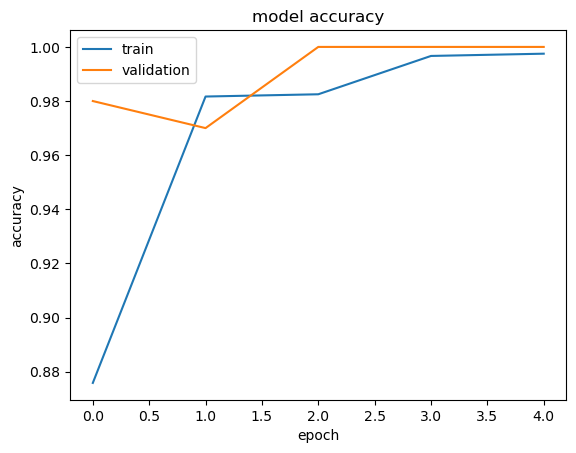

In [21]:
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')